In [1]:
from pymatgen import Lattice, Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine, Spin, Kpoint
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.symmetry.bandstructure import HighSymmKpath
from bs4 import BeautifulSoup
import numpy as np
import re
import os
from seaborn import kdeplot

# Ag Information
From Material Project org  
Spacegroup: 225  
Primitive Cell: 2.92, 2.92, 2.92, 60, 60, 60  

In [2]:
a = 4.161
alpha = 90.0
lattice = Lattice.from_parameters(a, a, a, alpha, alpha, alpha)
spacegroup = 225
species = ['Ag']
coords = [[0.0, 0.0, 0.0]]

In [3]:
ag = Structure.from_spacegroup(spacegroup, lattice, species, coords)

In [4]:
ag

Structure Summary
Lattice
    abc : 4.1609999999999996 4.1609999999999996 4.1609999999999996
 angles : 90.0 90.0 90.0
 volume : 72.043225280999977
      A : 4.1609999999999996 0.0 2.5478776656260679e-16
      B : 6.6913983453044839e-16 4.1609999999999996 2.5478776656260679e-16
      C : 0.0 0.0 4.1609999999999996
PeriodicSite: Ag (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Ag (0.0000, 2.0805, 2.0805) [0.0000, 0.5000, 0.5000]
PeriodicSite: Ag (2.0805, 0.0000, 2.0805) [0.5000, 0.0000, 0.5000]
PeriodicSite: Ag (2.0805, 2.0805, 0.0000) [0.5000, 0.5000, 0.0000]

In [5]:
analysis = SpacegroupAnalyzer(ag)
analysis.find_primitive()

Structure Summary
Lattice
    abc : 2.9422713165172238 2.9422713165172238 2.9422713165172238
 angles : 60.000000000000007 60.000000000000007 60.000000000000007
 volume : 18.010806320249994
      A : 0.0 -2.0804999999999998 -2.0804999999999998
      B : 2.0804999999999998 0.0 -2.0804999999999998
      C : 2.0804999999999998 -2.0804999999999998 0.0
PeriodicSite: Ag (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]

In [6]:
analysis.get_conventional_standard_structure()

Structure Summary
Lattice
    abc : 4.1609999999999996 4.1609999999999996 4.1609999999999996
 angles : 90.0 90.0 90.0
 volume : 72.043225280999977
      A : 4.1609999999999996 0.0 2.5478776656260679e-16
      B : 6.6913983453044839e-16 4.1609999999999996 2.5478776656260679e-16
      C : 0.0 0.0 4.1609999999999996
PeriodicSite: Ag (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Ag (0.0000, 2.0805, 2.0805) [0.0000, 0.5000, 0.5000]
PeriodicSite: Ag (2.0805, 0.0000, 2.0805) [0.5000, 0.0000, 0.5000]
PeriodicSite: Ag (2.0805, 2.0805, 0.0000) [0.5000, 0.5000, 0.0000]

In [7]:
analysis.get_space_group_number()

225

In [8]:
highsymm = HighSymmKpath(ag)
path, labels = highsymm.get_kpoints(line_density=20)

# Create labels_dict for BandStructure (TODO not sure how to create)
labels_dict = {label: kpoint for label, kpoint in zip(labels, path) if label}

In [9]:
# Rembember to use KPOINTS and set weight to 1
print(len(path))
for kpoint in path:
    print("{:0.3f} {:0.3f} {:0.3f} 1.0".format(*kpoint))

210
0.000 0.000 0.000 1.0
-0.000 0.049 0.000 1.0
-0.000 0.097 0.000 1.0
-0.000 0.146 0.000 1.0
-0.000 0.195 0.000 1.0
-0.000 0.244 0.000 1.0
-0.000 0.292 0.000 1.0
-0.000 0.341 0.000 1.0
-0.000 0.390 0.000 1.0
-0.000 0.438 0.000 1.0
-0.000 0.487 0.000 1.0
-0.000 0.536 0.000 1.0
-0.000 0.585 0.000 1.0
-0.000 0.633 0.000 1.0
-0.000 0.682 0.000 1.0
-0.000 0.731 0.000 1.0
-0.000 0.779 0.000 1.0
-0.000 0.828 0.000 1.0
-0.000 0.877 0.000 1.0
-0.000 0.925 0.000 1.0
-0.000 0.974 0.000 1.0
-0.000 1.023 0.000 1.0
-0.000 1.072 0.000 1.0
-0.000 1.120 0.000 1.0
-0.000 1.169 0.000 1.0
-0.000 1.218 0.000 1.0
-0.000 1.266 0.000 1.0
-0.000 1.315 0.000 1.0
-0.000 1.364 0.000 1.0
-0.000 1.413 0.000 1.0
-0.000 1.461 0.000 1.0
-0.000 1.510 0.000 1.0
-0.000 1.510 0.000 1.0
0.047 1.510 0.000 1.0
0.094 1.510 0.000 1.0
0.142 1.510 0.000 1.0
0.189 1.510 0.000 1.0
0.236 1.510 0.000 1.0
0.283 1.510 0.000 1.0
0.330 1.510 0.000 1.0
0.378 1.510 0.000 1.0
0.425 1.510 0.000 1.0
0.472 1.510 0.000 1.0
0.519 1.510 0.000 

In [10]:
# Load Calculation
root_path = '../examples/Ag/output/ag.save'
with open(os.path.join(root_path, 'data-file.xml')) as f:
    soup = BeautifulSoup(f.read(), 'lxml')

parsed_kpoints = []
eigenvalues = soup.select_one('eigenvalues')
for kpt in eigenvalues.findAll(re.compile('k-point\.\d+')):
    kpoint = {
        'coords': list(map(float, kpt.select_one('k-point_coords').text.split())),
        'weight': float(kpt.select_one('weight').text),
        'filename': kpt.select_one('datafile').attrs['iotk_link']
    }
    with open(os.path.join(root_path, kpoint['filename'])) as f:
        soup = BeautifulSoup(f.read(), 'lxml')
        kpoint['eigenvalues'] = list(map(float, soup.select_one('eigenvalues').text.split()))
        kpoint['occupations'] = list(map(float, soup.select_one('occupations').text.split()))
    parsed_kpoints.append(kpoint)
print('Read in %d kpoints' % len(parsed_kpoints))

Read in 210 kpoints


In [11]:
RYDBERG2EV = 13.605698066
eigenvalues =  np.transpose(np.array([kpoint['eigenvalues'] for kpoint in parsed_kpoints]))
eigenvalues = {Spin.up: eigenvalues * RYDBERG2EV}
fermi_energy = 4.510142047212857E-001 * RYDBERG2EV # Get from data-file.xml (<fermi_energy> tag) or outcar
bandstructure = BandStructureSymmLine(path, eigenvalues, lattice.reciprocal_lattice, fermi_energy, labels_dict=labels_dict)

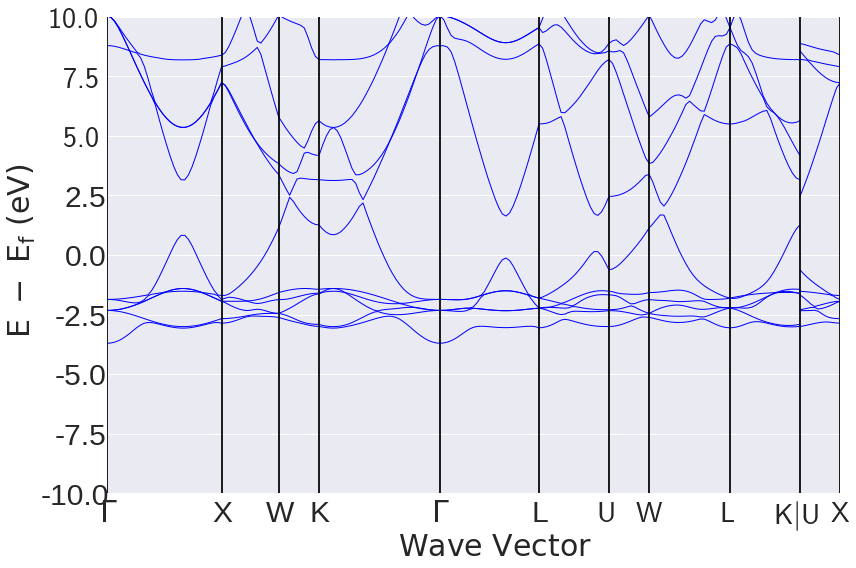

In [12]:
%matplotlib inline
plotter = BSPlotter(bandstructure)
plotter.get_plot().show()

Fermi Energy: 6.136363


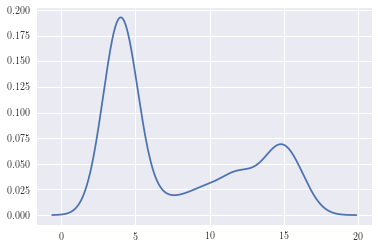

In [19]:
# DOS Plot
eigenvalues = []
for kpoint in parsed_kpoints:
    eigenvalues.extend(kpoint['eigenvalues'])
eigenvalues = np.array(eigenvalues) * RYDBERG2EV
print('Fermi Energy: %f' % fermi_energy)
kdeplot(np.array(eigenvalues), gridsize=10000)